In [1]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



We'll use the diabetes built-in dataset which contains a set of predictive variables for predicting some quantitative measure of diabetes disease progression.

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()


Undertake `data description`

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Create the DataFrame using the data we have loaded above

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['progression'] = pd.Series(data.target)

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


1. Training the model¶



Let's start by training a model that we can save later. We'll build a multiple linear regression model on the Sklearn's internal dataset.

Preprocessing


Having reviewed the data, we now perform a minimal amount of preprocessing to prepare for model fitting and evaluation:

In [6]:
# split data into X and y
y = df['progression']
X = df.drop('progression', axis=1)

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# get training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

`Model fitting and evaluation`


We now fit our model to the data. For this example, we choose a vanilla linear regression model, however, we can still explore more complex models within sklearn.

In [7]:
# define the model 
model = LinearRegression()

# fit the model 
model.fit(X_train, y_train)

# get predictions on the test set 
y_pred = model.predict(X_test)

# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 2900.193628493481


In cases where visualising how the model performs on the actual data is not possible (i.e. too many dimensions), we can plot the actual vs the predicted 𝑦 values:

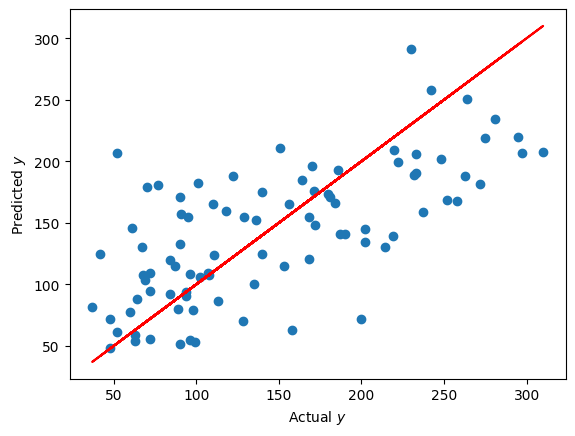

In [8]:
plt.scatter(y_test,y_pred) 
plt.plot(y_test,y_test,"r") # perfect model line
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

At a glance, our MLR model seems to have decent performance. Now let's try to save it.

2. Object Serialization

Saving the model with Pickle

In [9]:
# Importing the pickle library
import pickle

# Save the model just like we would a Python file
model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

Restoring the model with Pickle

In [10]:
# restore the model just like we would read a file
model_load_path = "mlr_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

Using the model file to make predictions

In [11]:
# get predictions from unpickled model
y_pred = unpickled_model.predict(X_test)

In [12]:
# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 2900.193628493481


`Exercises`

Exercises


We are provided with the Crop_yield dataset that contains various factors that could influence the yield of a particular crop across different regions.

We are interested in how some features, namely: Temperature, Rainfall, Fertilizer_usage, and Pesticide_usage influence the yield of the crop.

`Import libraries and dataset`

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [14]:
# Load dataset
df= pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/Python/Crop_yield.csv")
df.head(5)

,Region,Temperature,Rainfall,Soil_Type,Fertilizer_Usage,Pesticide_Usage,Irrigation,Crop_Variety,Yield
0,East,23.152156,803.362573,Clayey,204.792011,20.767590,1,Variety B,40.316318
1,West,19.382419,571.567670,Sandy,256.201737,49.290242,0,Variety A,26.846639
2,North,27.895890,-8.699637,Loamy,222.202626,25.316121,0,Variety C,-0.323558
3,East,26.741361,897.426194,Loamy,187.984090,17.115362,0,Variety C,45.440871
4,East,19.090286,649.384694,Loamy,110.459549,24.068804,1,Variety B,35.478118


`Exercise 1`



We begin by training and evaluating a multiple linear regression model to map the relationship between the features: `Temperature`, `Rainfall`, `Fertilizer_usage`, and `Pesticide_usage` and the response variable, `Yield`. This model will enable us to predict crop yields based on the given factors.

In [15]:
# Define predictors and target variable
X = df[['Temperature', 'Rainfall', 'Fertilizer_Usage', 'Pesticide_Usage']]
y = df['Yield']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model's performance on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R-squared: {r2}")

Test MSE: 0.3346060708725867
Test R-squared: 0.9963871774411283


`Exercise 2`



We want to be able to conveniently retrieve and use the model for predictions in future. We therefore need to persist the trained model by saving it to a file.

Use the Pickle library to serialize the model and store it in a file named crop_yield_model.pkl.

In [16]:
# Define the path where the model will be saved.
model_save_path = 'crop_yield_model.pkl'

# Save the trained model to a file
with open(model_save_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_save_path}")

Model saved to crop_yield_model.pkl


`Exercise 3`



We have received a new set of conditions for which we need to predict the crop yield. To accomplish this, we'll utilize the model we previously trained and saved.

New conditions:

Temperature - 25
Rainfall - 150
Fertilizer usage - 200
Pesticide usage - 30
Prepare the new data, load the saved model and use it to make predictions on the given feature values.

In [17]:
# A dictionary to store the new set of conditions
new_conditions = {
    'Temperature': [25],  # average temperature in °C
    'Rainfall': [150],  # total rainfall in mm
    'Fertilizer_Usage': [200],  # fertilizer used in kg per hectare
    'Pesticide_Usage': [30]  # pesticide used in liters per hectare
}

# Convert to DataFrame
new_conditions_df = pd.DataFrame(new_conditions)

# This is where the model is saved
model_load_path = 'crop_yield_model.pkl'

# Load the updated model
with open(model_load_path, 'rb') as file:
    loaded_model = pickle.load(file)

# Use the model to predict the yield for the new conditions
predicted_yield = loaded_model.predict(new_conditions_df)

print(f"Predicted Yield for the new conditions: {predicted_yield[0]} tonnes per hectare")

Predicted Yield for the new conditions: 8.172860333818216 tonnes per hectare
